In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

from tensorflow import keras

2023-04-14 09:08:42.322517: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 09:08:42.838313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



# Load Dataset
 - PassengerId: A unique identifier for each passenger
 - Survived: A binary variable indicating whether the passenger survived (1) or did not survive (0)
 - Pclass: A categorical variable indicating the passenger's class (1 = first class, 2 = second class, 3 = third class)
 - Name: The passenger's name
 - Sex: The passenger's gender (male or female)
 - Age: The passenger's age
 - SibSp: The number of siblings or spouses the passenger had on board
 - Parch: The number of parents or children the passenger had on board
 - Ticket: The passenger's ticket number
 - Fare: The fare the passenger paid for their ticket
 - Cabin: The passenger's cabin number
 - Embarked: The port from which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:

df = pd.read_csv("modified_titanic_data1.csv")
# .head shows the first n rows of the dataset, default 10
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime,Unnamed: 13
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1912-04-10 09:42:47,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,PC 17599,71.2833,C85,C,1912-04-10 09:54:01,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10 09:55:37,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1000,C123,S,1912-04-10 08:06:51,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1912-04-10 09:10:39,NaN


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            178
SibSp            0
Parch            0
Ticket           0
Fare            44
Cabin          689
Embarked         2
OnboardTime      0
Unnamed: 13    895
dtype: int64

In [5]:
#This 
df = df.drop(columns=["Unnamed: 13","Ticket"]) 
df.drop_duplicates(inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,1912-04-10 09:42:47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,71.2833,C85,C,1912-04-10 09:54:01
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,1912-04-10 09:55:37
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,53.1000,C123,S,1912-04-10 08:06:51
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,1912-04-10 09:10:39


In [6]:
print('Number of null Pclass:')
df['Pclass'].isna().sum()


Number of null Pclass:


0

No null Pclass

In [7]:
# inspect the correlation between Pclass and Survived
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Name

In [8]:
df['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

As we can see, there is a pattern of `LastName`,`Title` `FirstName`

Isolate the title per person

In [9]:
df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
890     Rev
891    Miss
892    Miss
893      Mr
894      Mr
Name: Name, Length: 891, dtype: object

In [10]:
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

# inspect the amount of people for each title
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

Majority of the titles are Mr Miss Mrs and Master. We can change some of the titles like Ms, Sir, Lady to merge with the majority titles

In [11]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
title_list = df['Title'].unique().tolist()
others = [title for title in title_list if title not in ['Mrs', 'Mr','Miss','Master']]
df['Title'] = df['Title'].replace(others, 'Others')


In [12]:
# inspect the amount of people for each title
df['Title'].value_counts()

Mr        517
Miss      184
Mrs       128
Master     40
Others     22
Name: Title, dtype: int64

In [13]:
# inspect the correlation between Title and Survived
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [14]:
title_dummies = pd.get_dummies(df['Title'])
title_dummies

,Master,Miss,Mr,Mrs,Others
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
890,0,0,0,0,1
891,0,1,0,0,0
892,0,1,0,0,0
893,0,0,1,0,0


In [15]:
df = pd.concat([df, title_dummies], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime,Title,Master,Miss,Mr,Mrs,Others
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,1912-04-10 09:42:47,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,71.2833,C85,C,1912-04-10 09:54:01,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,1912-04-10 09:55:37,Miss,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,53.1000,C123,S,1912-04-10 08:06:51,Mrs,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,1912-04-10 09:10:39,Mr,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,NaN,S,1912-04-10 08:36:53,Others,0,0,0,0,1
891,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,B42,S,1912-04-10 09:00:05,Miss,0,1,0,0,0
892,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,1912-04-10 09:11:02,Miss,0,1,0,0,0
893,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C148,C,1912-04-10 09:13:39,Mr,0,0,1,0,0


# Sex

In [16]:
print('Number of null Sex: ')
df['Sex'].isnull().sum()

Number of null Sex: 


0

In [17]:

# inspect the correlation between Title and Survived
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,F,1.000000
1,M,0.000000
2,f,1.000000
3,female,0.739550
4,m,0.000000
5,m,1.000000
6,male,0.188153


<Axes: xlabel='Sex', ylabel='Count'>

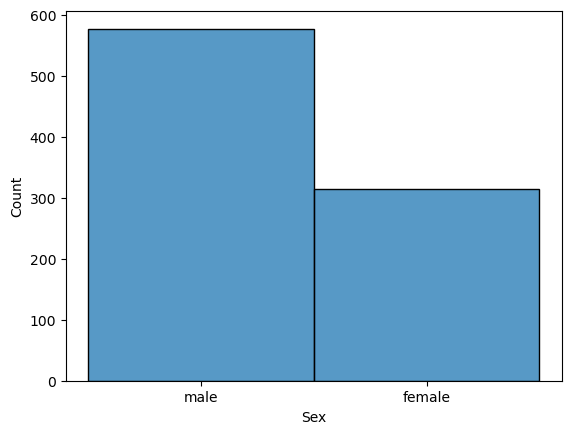

In [18]:

#This operation only maps values on the "Sex" column
df["Sex"] = df["Sex"].map({
    "male": "male",
    "m": "male",
    "m ": "male",
    "M": "male",
    "F": "female",
    "f": "female",
    "female": "female"
})
df["Sex"].unique()
sns.histplot(df['Sex'])

In [19]:
# inspect the correlation between Title and Survived
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
df['Sex'].replace( 'female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)

# Parch SibSP

- Parch - Number of parents or childern
- SibSp - Number of siblings or spouse

In [21]:

print('Number of null Parch: ')
df['Parch'].isnull().sum()

Number of null Parch: 


0

In [22]:

print('Number of null SibSp: ')
df['SibSp'].isnull().sum()

Number of null SibSp: 


0

In [23]:

# inspect the correlation between Title and Survived
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [24]:
# inspect the correlation between Title and Survived
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


We can probably combine the two columns to create a family group

In [25]:

df['Family'] = df['SibSp'] + df['Parch'] + 1

# inspect the correlation between Family and Survived
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


# Embarked

In [26]:

print('Number of null Embarked: ')
df['Embarked'].isnull().sum()

Number of null Embarked: 


2

In [27]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime,Title,Master,Miss,Mr,Mrs,Others,Family
64,62,1,1,"Icard, Miss. Amelie",0,38,0,0,80.0,B28,NaN,1912-04-10 08:42:36,Miss,0,1,0,0,0,1
833,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62,0,0,80.0,B28,NaN,1912-04-10 09:11:06,Mrs,0,0,0,1,0,1


In [28]:
embarked_null = df[df['Embarked'].isnull()]
df['Embarked'] = df['Embarked'].replace(np.NaN, 'S')

In [29]:
df.loc[embarked_null.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime,Title,Master,Miss,Mr,Mrs,Others,Family
64,62,1,1,"Icard, Miss. Amelie",0,38,0,0,80.0,B28,S,1912-04-10 08:42:36,Miss,0,1,0,0,0,1
833,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62,0,0,80.0,B28,S,1912-04-10 09:11:06,Mrs,0,0,0,1,0,1


In [30]:

# inspect the correlation between Embarked and Survived
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [31]:

embarked_dummies = pd.get_dummies(df['Embarked'])
embarked_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
890,0,0,1
891,0,0,1
892,0,0,1
893,1,0,0


In [32]:

df = pd.concat([df, embarked_dummies], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Title,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,NaN,...,Mr,0,0,1,0,0,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,-,1,0,71.2833,C85,...,Mrs,0,0,0,1,0,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,NaN,...,Miss,0,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,na,1,0,53.1000,C123,...,Mrs,0,0,0,1,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,NaN,...,Mr,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,13.0000,NaN,...,Others,0,0,0,0,1,1,0,0,1
891,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,30.0000,B42,...,Miss,0,1,0,0,0,1,0,0,1
892,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,NaN,...,Miss,0,1,0,0,0,4,0,0,1
893,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,30.0000,C148,...,Mr,0,0,1,0,0,1,1,0,0


# Fare


In [33]:

print('Number of null values in fare:')
df['Fare'].isna().sum()

Number of null values in fare:


44

In [34]:

null_fare_df = df[df['Fare'].isna()]
null_fare_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Title,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,NaN,E46,...,Mr,0,0,1,0,0,1,0,0,1
20,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,NaN,NaN,...,Mrs,0,0,0,1,0,1,1,0,0
22,22,1,2,"Beesley, Mr. Lawrence",1,34,0,0,NaN,D56,...,Mr,0,0,1,0,0,1,0,0,1
32,31,0,1,"Uruchurtu, Don. Manuel E",1,40,0,0,NaN,NaN,...,Others,0,0,0,0,1,1,1,0,0
50,49,0,3,"Samaan, Mr. Youssef",1,NaN,2,0,NaN,NaN,...,Mr,0,0,1,0,0,3,1,0,0


In [35]:
#But we could also get the different mean per pclass 
grouped = df.groupby(['Pclass'])['Fare'].mean()
#And use those means to fill the null values
fare_mean = df['Pclass'].map(grouped)
#Fill the null using the fare of Pclass
df_mean_per_class = df.copy()
df_mean_per_class['Fare'].fillna(fare_mean, inplace=True)
# df_mean_per_class.loc[null_fare_df.index]
df['Fare'] = df_mean_per_class['Fare']
df.iloc[null_fare_df.index].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Title,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,81.907054,E46,...,Mr,0,0,1,0,0,1,0,0,1
21,21,0,2,"Fynney, Mr. Joseph J",1,35,0,0,26.000000,NaN,...,Mr,0,0,1,0,0,1,0,0,1
23,23,1,3,"McGowan, Miss. Anna ""Annie""",0,15,0,0,8.029200,NaN,...,Miss,0,1,0,0,0,1,0,1,0
34,33,1,3,"Glynn, Miss. Mary Agatha",0,NaN,0,0,7.750000,NaN,...,Miss,0,1,0,0,0,1,0,1,0
52,51,0,3,"Panula, Master. Juha Niilo",1,7,4,1,13.637039,NaN,...,Master,1,0,0,0,0,6,0,0,1


In [36]:

# inspect the mean Fare values for people who died and survived
df[['Fare', 'Survived']].groupby(['Survived'],as_index=False).mean()

,Survived,Fare
0,0,21.982690
1,1,47.014141


/tmp/ipykernel_540/2626798597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

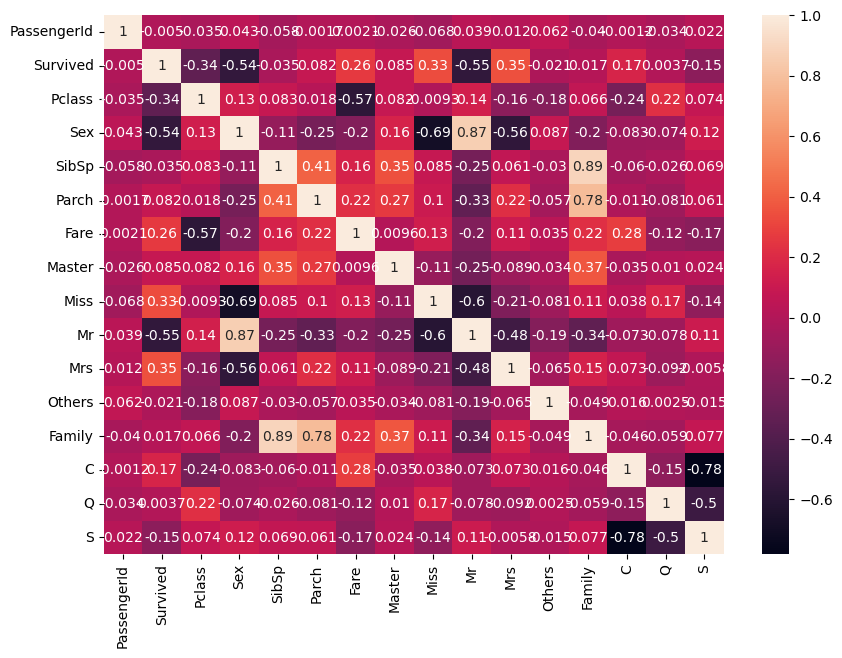

In [37]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)

# Neural Network

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'OnboardTime', 'Title', 'Master',
       'Miss', 'Mr', 'Mrs', 'Others', 'Family', 'C', 'Q', 'S'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name','Cabin', 'Embarked', 'OnboardTime', 'Age', 'PassengerId', 'Title'], axis=1)
y = df['Survived']



In [40]:

X.head()

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
0,3,1,1,0,7.2500,0,0,1,0,0,2,0,0,1
1,1,0,1,0,71.2833,0,0,0,1,0,2,1,0,0
2,3,0,0,0,7.9250,0,1,0,0,0,1,0,0,1
3,1,0,1,0,53.1000,0,0,0,1,0,2,0,0,1
4,3,1,0,0,8.0500,0,0,1,0,0,1,0,0,1


In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalization 

In [44]:
X_train.describe()

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.341894,0.658106,0.576244,0.386838,31.059964,0.049759,0.203852,0.590690,0.136437,0.019262,1.963082,0.176565,0.088283,0.735152
std,0.819945,0.474725,1.216267,0.807692,46.934262,0.217622,0.403184,0.492102,0.343527,0.137554,1.731192,0.381607,0.283933,0.441607
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.000000,30.285400,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000


### for fare


In [46]:
mean = X_train['Fare'].mean()
std = X_train['Fare'].std()

X_train['Fare'] = (X_train['Fare'] - mean) / std
X_train.describe()

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.341894,0.658106,0.576244,0.386838,-7.413367e-17,0.049759,0.203852,0.590690,0.136437,0.019262,1.963082,0.176565,0.088283,0.735152
std,0.819945,0.474725,1.216267,0.807692,1.000000e+00,0.217622,0.403184,0.492102,0.343527,0.137554,1.731192,0.381607,0.283933,0.441607
min,1.000000,0.000000,0.000000,0.000000,-6.617759e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,-4.929227e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,-3.538090e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.000000,-1.650316e-02,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,8.000000,6.000000,1.025411e+01,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000


In [47]:

mean = X_test['Fare'].mean()
std = X_test['Fare'].std()

X_test['Fare'] = (X_test['Fare'] - mean) / std
X_test.describe()

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
count,268.000000,268.000000,268.000000,268.000000,2.680000e+02,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2.231343,0.623134,0.399254,0.369403,-1.176505e-16,0.033582,0.212687,0.555970,0.160448,0.037313,1.768657,0.216418,0.082090,0.701493
std,0.869062,0.485507,0.765061,0.803618,1.000000e+00,0.180488,0.409973,0.497787,0.367707,0.189883,1.291947,0.412573,0.275015,0.458459
min,1.000000,0.000000,0.000000,0.000000,-7.290567e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,-5.531988e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000,-4.079729e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,0.000000,-3.441629e-02,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,4.000000,5.000000,5.098482e+00,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000


In [ ]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(1, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(X_train_float, y_train.values, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 1.4198 - accuracy: 0.3692
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3404 - accuracy: 0.3644
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2669 - accuracy: 0.3596
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 1.1961 - accuracy: 0.3596
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1316 - accuracy: 0.3531
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.3403
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0164 - accuracy: 0.3563
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9642 - accuracy: 0.3884
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9205 - accuracy: 0.3836
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8799 - accuracy: 0.5827
Epoch 11/

# Evaluate accuracy

In [ ]:
model.evaluate(X_test_float, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6978


[0.597957968711853, 0.6977611780166626]

In [ ]:
X_test[0:1]

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
713,3,1,1,1,0.029758,1,0,0,0,0,3,1,0,0


In [ ]:
# Make the predictions
y_predicted = model.predict(X_test_float)
y_predicted[0:1]

9/9 [==============================] - 0s 1ms/step


array([[0.60148126]], dtype=float32)

In [ ]:

y_test[0:1]

713    1
Name: Survived, dtype: int64

In [ ]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

0

In [ ]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[157,   0],
       [111,   0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

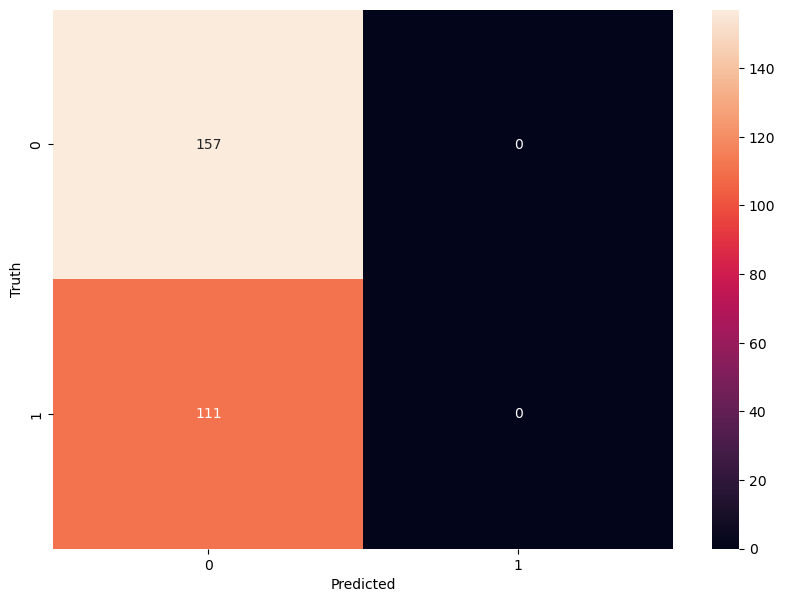

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# More layers

In [ ]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    # keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(X_train, y_train, epochs=50)

Epoch 1/200
20/20 [==============================] - 1s 3ms/step - loss: 0.6623 - accuracy: 0.6276
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.6324
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6324
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6057 - accuracy: 0.6324
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.6356
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.6404
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.5666 - accuracy: 0.6485
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.6854
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.7095
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.7271
Epoch 11/

# Evaluate accuracy

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8134


[0.4089580476284027, 0.8134328126907349]

In [ ]:
X_test[0:1]

,Pclass,Sex,SibSp,Parch,Fare,Master,Miss,Mr,Mrs,Others,Family,C,Q,S
713,3,1,1,1,0.029758,1,0,0,0,0,3,1,0,0


In [ ]:
# Make the predictions
y_predicted = model.predict(X_test)
y_predicted[0:1]

9/9 [==============================] - 0s 1ms/step


array([[0.862446]], dtype=float32)

<Axes: xlabel='Survived', ylabel='Count'>

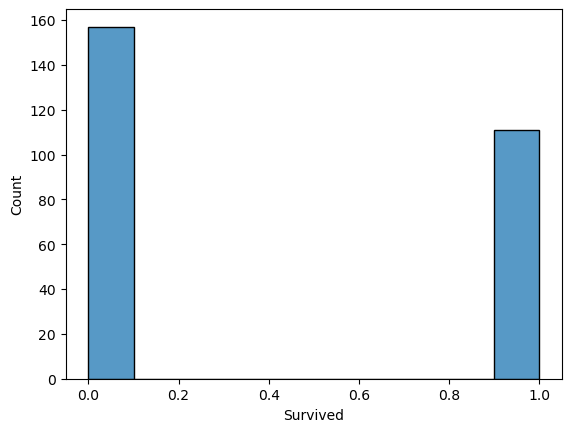

In [ ]:

sns.histplot(y_test)

In [ ]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

0

In [ ]:
# converting y_predicted from whole numbers to integers 
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
np.unique(y_predicted_labels)

array([0])

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[157,   0],
       [111,   0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

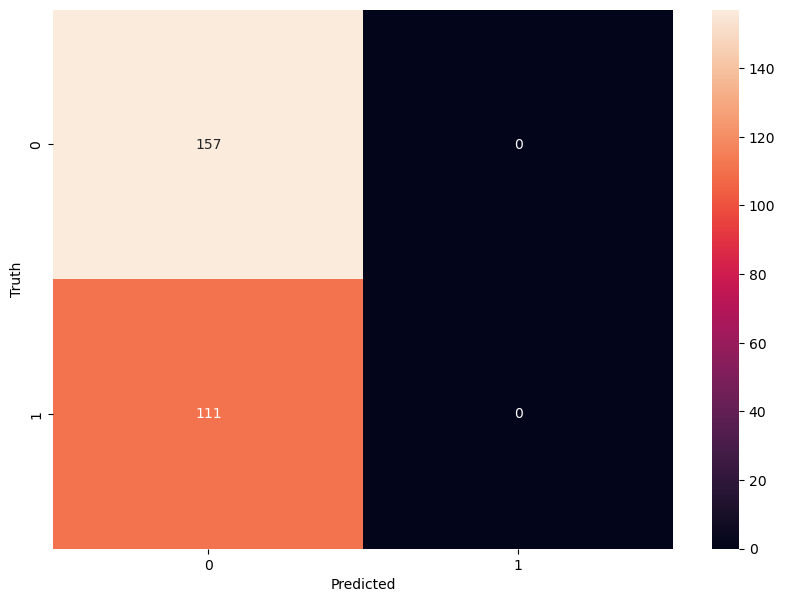

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')